In [1]:
import wrangle_zillow as wr
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

## Acquire and Summarize

### 1. Acquire data from the cloud database.
- You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.
- Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

In [2]:
df = wr.get_zillow()
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,...,6.037461e+13,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


### 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [3]:
# Summary stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,52319.0,1.496888e+06,8.594310e+05,3.490000e+02,7.575810e+05,1.500095e+06,2.241248e+06,2.982270e+06
parcelid,52319.0,1.299682e+07,3.350951e+06,1.071186e+07,1.151017e+07,1.257825e+07,1.413036e+07,1.676878e+08
airconditioningtypeid,13615.0,2.439589e+00,3.847925e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,70.0,7.100000e+00,2.665670e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,47.0,6.789787e+02,7.118252e+02,3.800000e+01,2.635000e+02,5.120000e+02,8.095000e+02,3.560000e+03
bathroomcnt,52319.0,2.300015e+00,1.022816e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,52319.0,3.300770e+00,9.475632e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.400000e+01
buildingclasstypeid,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildingqualitytypeid,33654.0,6.264961e+00,1.716328e+00,1.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
calculatedbathnbr,52184.0,2.305276e+00,1.018076e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01


In [4]:
#Info for the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52319 entries, 0 to 52318
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52319 non-null  int64  
 1   parcelid                      52319 non-null  int64  
 2   airconditioningtypeid         13615 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   basementsqft                  47 non-null     float64
 5   bathroomcnt                   52319 non-null  float64
 6   bedroomcnt                    52319 non-null  float64
 7   buildingclasstypeid           0 non-null      float64
 8   buildingqualitytypeid         33654 non-null  float64
 9   calculatedbathnbr             52184 non-null  float64
 10  decktypeid                    389 non-null    float64
 11  finishedfloor1squarefeet      4371 non-null   float64
 12  calculatedfinishedsquarefeet  52238 non-null  float64
 13  f

In [5]:
# Shape for dataset
df.shape

(52319, 68)

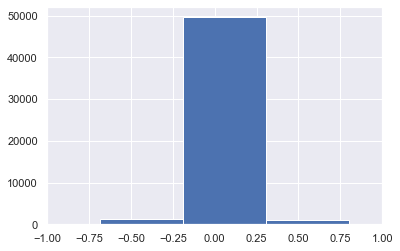

In [6]:
#Plotting distributions for target variable 
plt.hist(df.logerror, bins=20)
plt.xlim(-1, 1)
plt.show()

In [7]:
# Value_counts for dataset
df.value_counts()

Series([], dtype: int64)

### 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [8]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    percnt_miss = num_missing / df.shape[0] * 100
    cols_missing = pd.DataFrame(
    {
        'num_rows_missing': num_missing,
        'percent_rows_missing': percnt_miss
    })
    return  cols_missing

In [9]:
wr.nulls_by_col(df)

,num_rows_missing,percent_rows_missing
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,38704,73.976949
architecturalstyletypeid,52249,99.866205
basementsqft,52272,99.910166
...,...,...
buildingclassdesc,52319,100.000000
heatingorsystemdesc,18470,35.302663
propertylandusedesc,0,0.000000
storydesc,52272,99.910166


## Prepare

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [10]:
# Dropping rows within the dataframe that are either null or have a lot size of 0.
df.lotsizesquarefeet = df.lotsizesquarefeet.fillna(0)
df.lotsizesquarefeet = df.lotsizesquarefeet != 0


In [11]:
# Dropping duplexes and triplexes
df.unitcnt = df.unitcnt = 1

In [12]:
df.unitcnt.value_counts()

1    52319
Name: unitcnt, dtype: int64

### 2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).
- The input:
    - A dataframe
    - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
- The output:
    - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
- Hint:
    - Look up the dropna documentation.
    - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

In [13]:
def handle_missing_values(df, prop_required_column, prop_required_row):
    
    prop_null_column = 1 - prop_required_column
    
    for col in list(df.columns):
        
        null_sum = df[col].isna().sum()
        null_pct = null_sum / df.shape[0]
        
        if null_pct > prop_null_column:
            df.drop(columns=col, inplace=True)
            
    threshold = int(prop_required_row * df.shape[1])
    
    df.dropna(axis=0, thresh=threshold, inplace=True)
    
    return df

In [14]:
cleaned_df = handle_missing_values(df, .60, .75)
cleaned_df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,1727539,14297519,3.5,4.0,NaN,3.5,3100.0,3100.0,6059.0,3.0,...,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,NaN,Single Family Residential
1,1387261,17052889,1.0,2.0,NaN,1.0,1465.0,1465.0,6111.0,1.0,...,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,NaN,Single Family Residential
2,11677,14186244,2.0,3.0,NaN,2.0,1243.0,1243.0,6059.0,2.0,...,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,NaN,Single Family Residential
3,2288172,12177905,3.0,4.0,8.0,3.0,2376.0,2376.0,6037.0,3.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Central,Single Family Residential
4,781532,12095076,3.0,4.0,9.0,3.0,2962.0,2962.0,6037.0,3.0,...,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Central,Single Family Residential


### 3. Encapsulate your work inside of functions in a wrangle_zillow.py module

## Mall Customers

### 1. Acquire data from the customers table in the mall_customers database.

In [15]:
mall_df = wr.get_mall()
mall_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2. Summarize the data (include distributions and descriptive statistics)

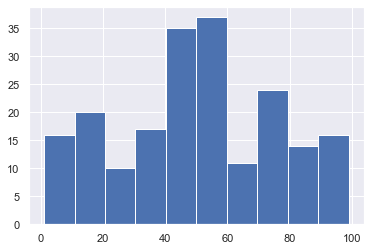

In [16]:
#Visualize distribution of target variable
plt.hist(mall_df.spending_score)
plt.show()

### 3. Detect outliers using IQR

In [17]:
#See the quantiles for age
mall_df['annual_income'].quantile([0.25, 0.75])

#Store the quantiles in variables
ai_q1, ai_q3 = mall_df['annual_income'].quantile([0.25, 0.75])

#Calculate the IQR
ai_iqr = ai_q3 - ai_q1

#Calculate upper and lower bounds based on a k value of 1.5
ai_upper = ai_q3 + (ai_iqr * 1.5)
ai_lower = ai_q1 - (ai_iqr * 1.5)

#Check for outliers in the age column
mall_df[mall_df['annual_income'] > ai_upper]

,customer_id,gender,age,annual_income,spending_score
198,199,Male,32,137,18
199,200,Male,30,137,83


### 4. Split data into train, validate, and test.

In [18]:
train, validate, test = wr.my_train_test_split(mall_df, 'spending_score')
train.head()

,customer_id,gender,age,annual_income,spending_score
123,124,Male,39,69,91
76,77,Female,45,54,53
171,172,Male,28,87,75
10,11,Male,67,19,14
35,36,Female,21,33,81


### 5.Encode categorical columns using a one hot encoder (pd.get_dummies)

In [19]:
#Check get_dummies works as expected on my training data
train = pd.get_dummies(train)
train.drop(columns=['gender_Male'], inplace=True)
train

,customer_id,age,annual_income,spending_score,gender_Female
123,124,39,69,91,0
76,77,45,54,53,1
171,172,28,87,75,0
10,11,67,19,14,0
35,36,21,33,81,1
...,...,...,...,...,...
175,176,30,88,86,1
101,102,49,62,48,1
148,149,34,78,22,1
99,100,20,61,49,0


### 6. Handles missing values.

In [20]:
wr.handle_missing_values(train, .75, .75)

,customer_id,age,annual_income,spending_score,gender_Female
123,124,39,69,91,0
76,77,45,54,53,1
171,172,28,87,75,0
10,11,67,19,14,0
35,36,21,33,81,1
...,...,...,...,...,...
175,176,30,88,86,1
101,102,49,62,48,1
148,149,34,78,22,1
99,100,20,61,49,0


- No rows were dropped

### 7. Scaling

In [21]:
mms = MinMaxScaler()

train[['age', 'annual_income']] = mms.fit_transform(train[['age','annual_income']])

train.head()

,customer_id,age,annual_income,spending_score,gender_Female
123,124,0.403846,0.442623,91,0
76,77,0.519231,0.319672,53,1
171,172,0.192308,0.590164,75,0
10,11,0.942308,0.032787,14,0
35,36,0.057692,0.147541,81,1
